In [1]:
# Documentation :
# https://rasterio.readthedocs.io/en/latest/quickstart.html
# https://hatarilabs.com/ih-en/ndvi-calculation-from-landsat8-images-with-python-3-and-rasterio-tutorial
# https://www.laterre.ca/utiliterre/nouveautes/lindice-ndvi-demystifie

# Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline

# Les SI géographique utilisent GeoTIFF et d'autres formats pour organiser et 
# stocker des ensembles de données sous formes de matrices, comme des images satellite. 
# Rasterio lit et écrit ces formats et fournit une API Python basée sur des tableaux Numpy à N dimensions et GeoJSON.
import rasterio
from rasterio import plot
from rasterio.plot import show

import matplotlib.pyplot as plt
import numpy as np

import os

# Bande spectrale Rouge
band4 = rasterio.open(os.getcwd()+'/Images/LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif') 
# Bande spectrale infraRouge = NIR
band5 = rasterio.open(os.getcwd()+'/Images/LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif') 

In [43]:
# uint16 = unsigned integer 16 => ne peut contenir que des valeurs positives allant de 0 à 2^16
print("Le dataset band4 a pour type : "+band4.dtypes[0])

Le dataset band4 a pour type : uint16


In [9]:
# CRS = Coordinate Reference System => permet à Python de savoir où le raster est localisé dans l'espace.
band4.crs

CRS.from_epsg(32611)

In [48]:
# Un jeu de données matricielles GIS (Geographic Information System) est différent d'une image ordinaire. 
# Ses éléments (ou "pixels") sont mis en correspondance avec des régions de la surface de la terre. 
# Chaque pixel d'un jeu de données est contenu dans une boîte de délimitation spatiale.

# La transformation d'un jeu de données est une matrice de transformation affine qui fait correspondre 
# les emplacements des pixels en coordonnées (ligne, colonne) à des positions spatiales (x, y). => tranform 
# Le produit de cette matrice et (0, 0), les coordonnées de ligne et de colonne du coin supérieur gauche 
# de l'ensemble de données, est la position spatiale du coin supérieur gauche.

# Les valeurs de ces coordonées sont relatives à l'origine du CRS du dataset vue précedemment !
print(band4.transform * (0,0))
print(band4.transform * (45,1))

# "EPSG 32611" identifie un système de référence de coordonnées particulier : UTM zone 12N. 
# C'est beaucoup de données assez complexe à comprendre mais pour vulgariser je dirais que 
# pour cartographier le monde, les scientifiques ont décidés de découper le monde en petite zone. 
# Chaque petite zone à un point référentiel => CRS. 
# Le coin supérieur gauche du jeu de données de l'exemple, (229755.0, 4011285.0), 
# se trouve à 4011 kilomètres au nord de l'équateur.

band4.transform 
# affine => matrice de transformation 
# https://app.dogeo.fr/Projection/#/point-to-coords pour se référencer dans l'espace 

band4.bounds
# chaque pixels est contenu dans une boîte de délimitation spatiale
# Ici bounds donne valeurs extrêmes pixel à gauche droite haut bas 

(229755.0, 4011285.0)
(231105.0, 4011255.0)


BoundingBox(left=229755.0, bottom=3971145.0, right=292965.0, top=4011285.0)

In [46]:
# Les données en provenance d'une bande sont accessibles grâce à la méthode read() avec un index correspondant au numéro 
# de la bande. Ici on a qu'une seule bande pour chaque dataset donc seul l'index 1 permet de lire les données - on peut
# choisir de le spécifier ou non.
print(band4.read())
print("------------------------------------------------------")
print(band5.read(1))

[[[ 7479  7474  7472 ...  8970  9186  9849]
  [ 7482  7488  7477 ...  9048  9151  9667]
  [ 7497  7468  7454 ...  9115  9150 10156]
  ...
  [17295 16415 16222 ... 11569 11376 11254]
  [17162 16303 15322 ... 11617 11278 11115]
  [16905 16026 15720 ... 12508 12893 13168]]]
------------------------------------------------------
[[24079 24061 24131 ...  9747 10231 11190]
 [24169 24213 24173 ...  9900 10084 10855]
 [24253 24438 24265 ...  9910 10079 11592]
 ...
 [21594 20611 20397 ... 20179 20035 19973]
 [21441 20507 19362 ... 20189 19976 19941]
 [21080 20536 20172 ... 20531 20744 20915]]


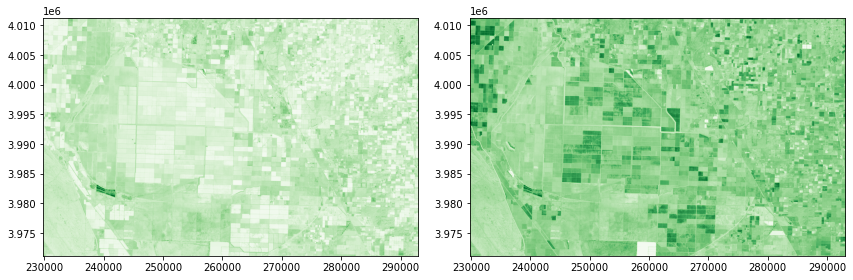

In [56]:
# subplots (1,n) => pour préciser le nb d'img qu'on veut afficher, soit de 1 à n
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6)) 
plot.show(band4, ax=ax1, cmap='Greens') #red
plot.show(band5, ax=ax2, cmap='Greens') #nir
fig.tight_layout()

In [57]:
# on convertit en float car le calcul ndvi c'est une division 
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')

nir

array([[24079., 24061., 24131., ...,  9747., 10231., 11190.],
       [24169., 24213., 24173., ...,  9900., 10084., 10855.],
       [24253., 24438., 24265., ...,  9910., 10079., 11592.],
       ...,
       [21594., 20611., 20397., ..., 20179., 20035., 19973.],
       [21441., 20507., 19362., ..., 20189., 19976., 19941.],
       [21080., 20536., 20172., ..., 20531., 20744., 20915.]])

In [58]:
#ndvi calculation, empty cells or no data cells are reported as 0
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))
ndvi[:5,:5]

array([[0.52601559, 0.525987  , 0.5271335 , 0.52442396, 0.52136479],
       [0.52721873, 0.52758588, 0.52751975, 0.5246888 , 0.52311125],
       [0.52774803, 0.53187488, 0.52999779, 0.52700989, 0.52593861],
       [0.53090761, 0.52997044, 0.52947468, 0.52603985, 0.52432536],
       [0.5317881 , 0.52931154, 0.53190956, 0.52842704, 0.52400689]])

In [59]:
#export ndvi image
ndviImage = rasterio.open('ndviImage.tiff','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

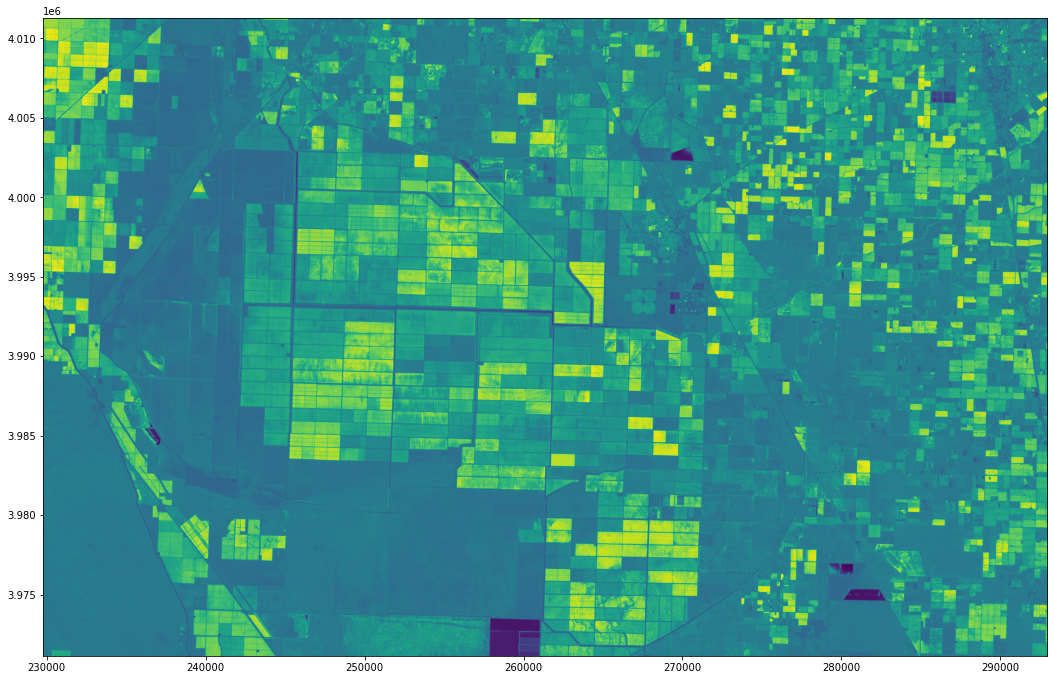

<AxesSubplot:>

In [60]:
#plot ndvi
ndvi = rasterio.open('ndviImage.tiff')
fig = plt.figure(figsize=(18,12))
plot.show(ndvi)

In [61]:
# ndvi representation
# Zone clair => zone à forte végétation - bonne santé 